In [14]:
import json
import sys
import numpy as np
from datetime import datetime

time_format = '%Y-%m-%dT%H:%M:%SZ'

#allRuns = ['config_3/results_parsec_run1.json', 'config_3/results_parsec_run2.json', 'config_3/results_parsec_run3.json']
allRuns = ['config_3/resultsB2.json', 'config_3/resultsB3.json', 'config_3/resultsB4.json']
total_times = np.zeros((3,7))
start_rel_times = np.zeros((3,7))
for run in allRuns:
    file = open(run, 'r')
    json_file = json.load(file)
    start_times = []
    completion_times = []
    names = []
    #start_rel_times = []

    pos = allRuns.index(run)
    
    for item in json_file['items']:
        name = item['status']['containerStatuses'][0]['name']
        print(name)
        names.append(name)
        print("Job: ", str(name))
        if str(name) != "memcached":
            try:
                start_time = datetime.strptime(
                        item['status']['containerStatuses'][0]['state']['terminated']['startedAt'],
                        time_format)
                creation_time = datetime.strptime(item['status']['startTime'],time_format)
                print('startedAt', start_time)
                print('startTime', creation_time)
                completion_time = datetime.strptime(
                        item['status']['containerStatuses'][0]['state']['terminated']['finishedAt'],
                        time_format)
                print('finishedAt', completion_time)
                print("Job time: ", completion_time - start_time)
                start_times.append(start_time)
                completion_times.append(completion_time)
            except KeyError:
                print("Job {0} has not completed....".format(name))
                sys.exit(0)

    if len(start_times) != 6 and len(completion_times) != 6:
        print("You haven't run all the PARSEC jobs. Exiting...")
        sys.exit(0)
        
    total_times[pos,0:6] = [(x - y).total_seconds() for x,y in zip(completion_times, start_times)]
    start_rel_times[pos,0:6] = [(x - min(start_times)).total_seconds() for x in (start_times)]
    total_times[pos,-1] = (max(completion_times) - min(start_times)).total_seconds()
    #print(names)
    #print(total_times)
    print("Total time: {0}".format(max(completion_times) - min(start_times)))
    print("-----------")
    file.close()
    print((max(completion_times) - min(start_times)).total_seconds())
    
# Results for part 3a
print(total_times)
print(start_rel_times)
print(names)
means = np.mean(total_times,0)
print('means',means)
std = np.std(total_times,0)
print('std',std)


parsecblackscholes
Job:  parsecblackscholes
startedAt 2022-05-16 17:46:44
startTime 2022-05-16 17:46:42
finishedAt 2022-05-16 17:48:17
Job time:  0:01:33
parseccanneal
Job:  parseccanneal
startedAt 2022-05-16 17:48:21
startTime 2022-05-16 17:48:19
finishedAt 2022-05-16 17:51:17
Job time:  0:02:56
parsecdedup
Job:  parsecdedup
startedAt 2022-05-16 17:49:41
startTime 2022-05-16 17:49:39
finishedAt 2022-05-16 17:50:03
Job time:  0:00:22
parsecferret
Job:  parsecferret
startedAt 2022-05-16 17:44:45
startTime 2022-05-16 17:44:43
finishedAt 2022-05-16 17:49:36
Job time:  0:04:51
parsecfreqmine
Job:  parsecfreqmine
startedAt 2022-05-16 17:44:45
startTime 2022-05-16 17:44:43
finishedAt 2022-05-16 17:46:41
Job time:  0:01:56
parsec-splash2x-fft
Job:  parsec-splash2x-fft
startedAt 2022-05-16 17:46:50
startTime 2022-05-16 17:46:42
finishedAt 2022-05-16 17:48:58
Job time:  0:02:08
Total time: 0:06:32
-----------
392.0
parsecblackscholes
Job:  parsecblackscholes
startedAt 2022-05-16 17:54:45
startT

In [3]:
# Plot diagram for memcached indicating when each job was deployed: 
import pandas as pd
base_path = 'config_3/memcached_run'
run_results = []
run_achieved_qps = []
# Load each run's results
nRuns =  3 
for i in range(1, nRuns+1):
    data = pd.read_csv(base_path + str(i) + '.raw' ,delim_whitespace=True)
    res = list(data['p95'])
    qps = list(data['QPS'])
    run_results.append(res)
    run_achieved_qps.append(qps)
    

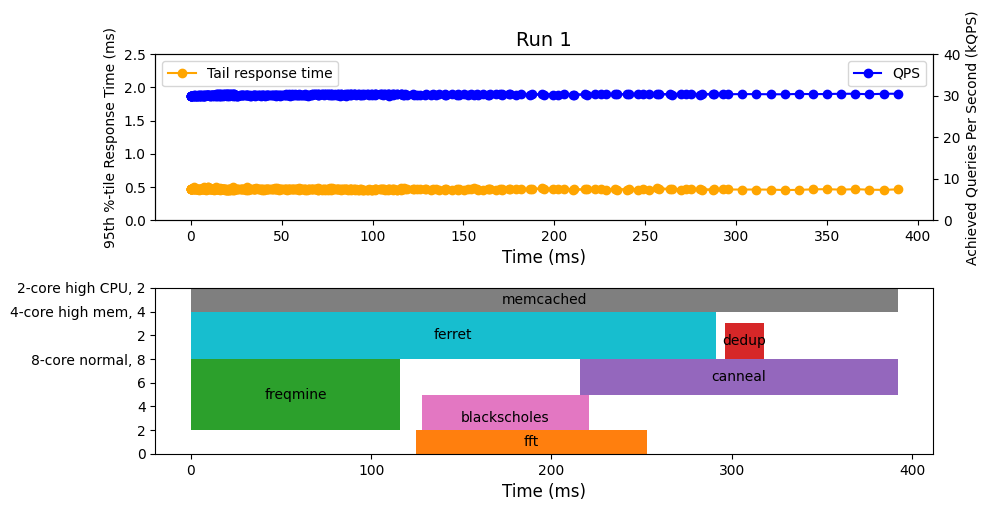

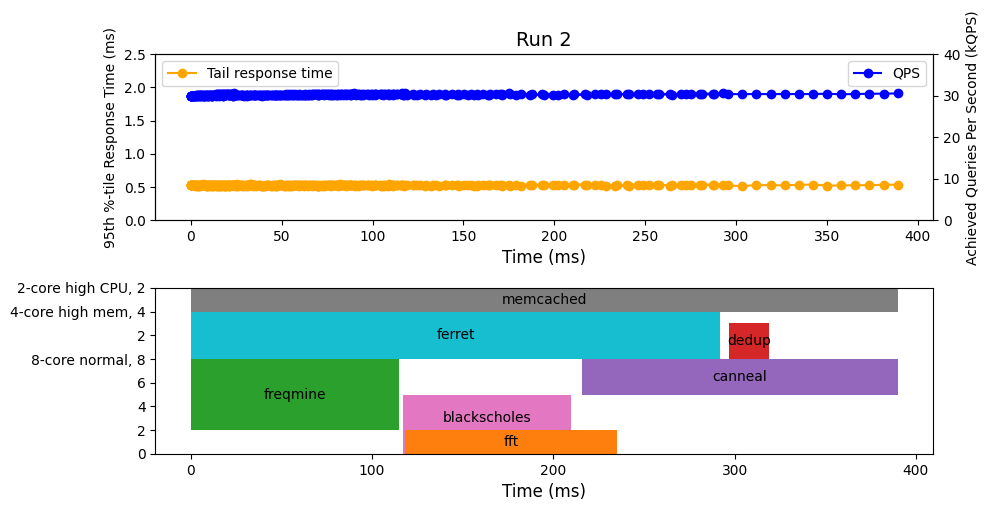

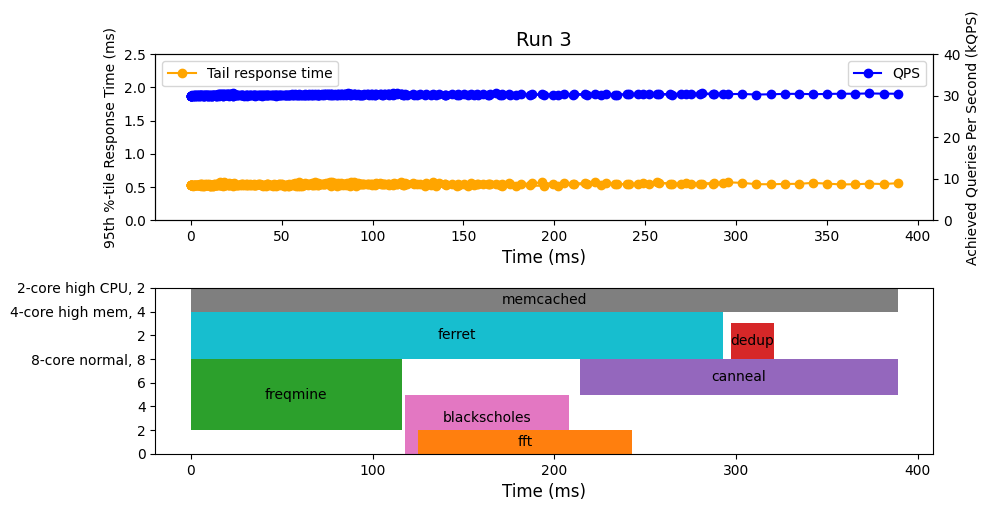

In [49]:
import math
import matplotlib.pyplot as plt
#i = 0
for i in range(0, nRuns):
    fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(10,5),dpi=100)
    # First plot:
    resultsTime = [item for item in run_results[i] if not(math.isnan(item)) == True]
    resultsQPS = [item for item in run_achieved_qps[i] if not(math.isnan(item)) == True]
    time = np.linspace(start=0, stop=total_times[-1], num=len(resultsTime))

    ax[0].plot(time,np.array(resultsTime)/1000.0, color = "orange",marker = "o")
    ax[0].set_xlabel("Time (ms)", fontsize = 12)
    ax[0].set_ylabel("95th %-tile Response Time (ms)", fontsize = 10)
    ax2 = ax[0].twinx()
    ax2.plot(time,np.array(resultsQPS)/1000.0, color = "blue", marker = "o")
    ax2.set_ylabel("Achieved Queries Per Second (kQPS)", fontsize = 10)
    y2labs = ['0k', '5k','10k','15k','20k','25k','30k','35k','40k','45k','50k','55k','60k']
    ax2.set_yticks(range(0, 50, 10))
    y1labs = ['0', '1','2','3','4','5','6','7','8','9','10']
    ax[0].set_yticks([0,0.5,1,1.5,2,2.5])
    #ax[0].set_yticks(range(0,2,0))
    ax[0].legend(['Tail response time'], fontsize=10, loc='upper left')
    ax2.legend(['QPS'], fontsize=10,loc='upper right')


    # Second plot:
    timesJobs = total_times[i]
    startJobs = start_rel_times[i]
    ax[1].set_xlabel("Time (ms)", fontsize = 12)
    ax[1].set_ylim(0,14)
    ax[1].set_yticks([0,2,4,6,8,10,12,14])
    ylabs_parsec = ['0','2','4','6','8-core normal, 8', '2','4-core high mem, 4', '2-core high CPU, 2']
    ax[1].set_yticklabels(ylabs_parsec)
    ax[1].set_xticks([0,100,200,300,400])
    #ax[1].set_xlim(0,450)
    #['parsecblackscholes', 'parseccanneal', 'parsecdedup', 'parsecferret', 'parsecfreqmine', 'parsec-splash2x-fft', 'memcached']
    #Memcached
    ax[1].broken_barh([(startJobs[-1],timesJobs[-1])],(12,2), facecolors = 'tab:gray')
    ax[1].annotate('memcached',(timesJobs[-1]/2,13),color='black', horizontalalignment='center', verticalalignment='center')
    #Freqmine n=4
    ax[1].broken_barh([(startJobs[4],timesJobs[4])], (2,6), facecolors = 'tab:green')
    ax[1].annotate('freqmine',(timesJobs[4]/2, 5), color = 'black', horizontalalignment='center', verticalalignment='center')
    #Canneal n=1
    ax[1].broken_barh([(startJobs[1],timesJobs[1])], (5,3), facecolors = 'tab:purple')
    ax[1].annotate('canneal',( (2*startJobs[1]+timesJobs[1])/2, 6.5), color = 'black', horizontalalignment='center', verticalalignment='center')
    #Blackscholes n=0
    ax[1].broken_barh([(timesJobs[5],timesJobs[0])], (0,5), facecolors = 'tab:pink')
    ax[1].annotate('blackscholes',((2*timesJobs[5]+timesJobs[0])/2, 3), color = 'black', horizontalalignment='center', verticalalignment='center')
     #FFT n=5
    ax[1].broken_barh([(startJobs[5],timesJobs[5])], (0,2), facecolors = 'tab:orange')
    ax[1].annotate('fft',((2*startJobs[5] + timesJobs[5])/2, 1), color = 'black', horizontalalignment='center', verticalalignment='center')
    #Ferret n=3
    ax[1].broken_barh([(startJobs[3],timesJobs[3])], (8,4), facecolors = 'tab:cyan')
    ax[1].annotate('ferret',((timesJobs[3])/2, 10), color = 'black', horizontalalignment='center', verticalalignment='center')
    #Dedup n=2
    ax[1].broken_barh([(startJobs[2],timesJobs[2])], (8,3), facecolors = 'tab:red')
    ax[1].annotate('dedup',((timesJobs[2]+2*startJobs[2])/2, 9.5), color = 'black', horizontalalignment='center', verticalalignment='center')


    plt.title('Run ' + str(i+1), fontsize = 14)
    plt.tight_layout()

    plt.savefig("run" + str(i+1) + ".pdf", bbox_inches = "tight")
#plt.show()